# **RNN Introduction**


In [1]:
!pip install mplfinance
!pip install opendatasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.4 MB/s eta 0:00:00


## Importing required libraries


In [31]:
# Basic libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# For processing
import math
import random
import datetime as dt
import matplotlib.dates as mdates
from sklearn.preprocessing import LabelEncoder

# For visualization
import matplotlib.pyplot as plt
from mplfinance.original_flavor import candlestick_ohlc

# Libraries for model training
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Dropout
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

## Loading and preprocessing the data
### Dataset 4-Deep learning/5-Time Series Forecasting (RNN)/LAB/ٌDatasets/traffic.csv

In [5]:
df = pd.read_csv('traffic.csv', parse_dates=['DateTime'],).iloc[:, 1:]
df.head()

,Junction,Vehicles,ID
0,1,15,20151101001
1,1,13,20151101011
2,1,10,20151101021
3,1,7,20151101031
4,1,9,20151101041


In [6]:
df.isnull().sum()

,0
Junction,0
Vehicles,0
ID,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Junction  48120 non-null  int64
 1   Vehicles  48120 non-null  int64
 2   ID        48120 non-null  int64
dtypes: int64(3)
memory usage: 1.1 MB


In [10]:
df = pd.read_csv('traffic.csv')
df.head()


,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


In [11]:
df.drop('ID', axis=1, inplace=True)
df.head()

,DateTime,Junction,Vehicles
0,2015-11-01 00:00:00,1,15
1,2015-11-01 01:00:00,1,13
2,2015-11-01 02:00:00,1,10
3,2015-11-01 03:00:00,1,7
4,2015-11-01 04:00:00,1,9


## Visualization

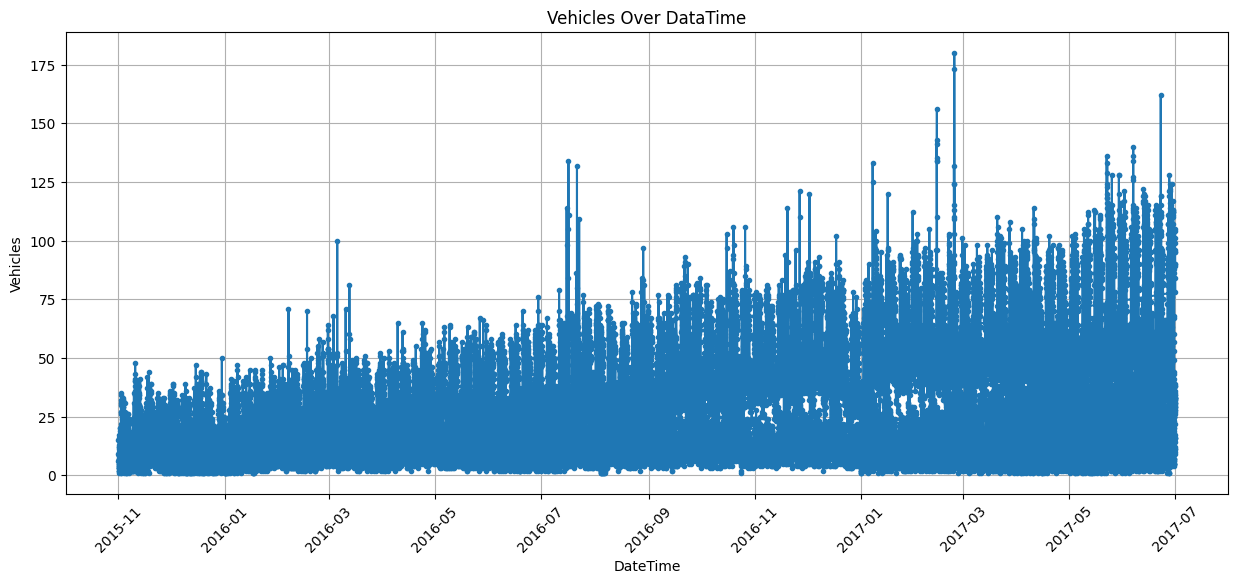

In [14]:
df['DateTime'] = pd.to_datetime(df['DateTime'])

plt.figure(figsize=(15, 6))
plt.plot(df['DateTime'], df['Vehicles'], marker='.')
plt.title('Vehicles Over DataTime')
plt.xlabel('DateTime')
plt.ylabel('Vehicles')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## Here is about Notmalize the data

In [15]:
scaler = MinMaxScaler()
df['Vehicles'] = scaler.fit_transform(df['Vehicles'].values.reshape(-1, 1))

In [17]:
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i+seq_length])
    return np.array(sequences)

In [18]:
sequence_length = 10
X = create_sequences(df['Vehicles'].values, sequence_length)
y = df['Vehicles'][sequence_length:].values

## Split the data into train and test

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Modeling


In [22]:
model = Sequential()
model.add(SimpleRNN(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(SimpleRNN(units=50, return_sequences=True))
model.add(SimpleRNN(units=50))
model.add(Dense(units=1))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 10, 50)              │           2,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 10, 50)              │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_2 (SimpleRNN)             │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,751 (49.81 KB)

 Trainable params: 12,751 (49.81 KB)

 Non-trainable params: 0 (0.00 B)

In [46]:
# Reshape input data for RNN([samples, time steps, features])
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [35]:
# Initialize a sequential model
model = Sequential()

# First RNN layer with 30 units, input shape, and return sequences
model.add(SimpleRNN(units=30, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))         # Adding dropout to prevent overfitting

# Second RNN layer with 50 units and return sequences
model.add(SimpleRNN(units=30, return_sequences=True))
model.add(Dropout(0.2))

# Third RNN layer with 30 units
model.add(SimpleRNN(units=30))
model.add(Dropout(0.2))

# Add a dense output layer with one unit
model.add(Dense(units=1))
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_6 (SimpleRNN)             │ (None, 10, 30)              │             960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 10, 30)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_7 (SimpleRNN)             │ (None, 10, 30)              │           1,830 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 10, 30)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_8 (SimpleRNN)             │ (None, 30)                  │           1,830 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 30)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              31 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,651 (18.17 KB)

 Trainable params: 4,651 (18.17 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
model.compile(loss='mean_squared_error',optimizer='adam')

In [38]:
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test),callbacks= [early_stopping])


Epoch 1/30
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - loss: 0.0031 - val_loss: 8.7799e-04
Epoch 2/30
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - loss: 0.0017 - val_loss: 8.5173e-04
Epoch 3/30
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - loss: 0.0014 - val_loss: 8.0799e-04
Epoch 4/30
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - loss: 0.0013 - val_loss: 7.8824e-04
Epoch 5/30
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - loss: 0.0012 - val_loss: 7.7258e-04
Epoch 6/30
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.0011 - val_loss: 8.4515e-04
Epoch 7/30
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - loss: 0.0011 - val_loss: 8.5330e-04
Epoch 8/30
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - loss: 0.0010 - val_loss: 7.5924e-04
Epoch 9/30
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - loss: 0.0010 - val_loss: 7.6924e-04
Epoch 10/30
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - loss: 0.0011 - val_loss: 7.6602e-04
Epoch 11/30
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - loss:

In [39]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

1203/1203 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step
301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


## Visualization of results


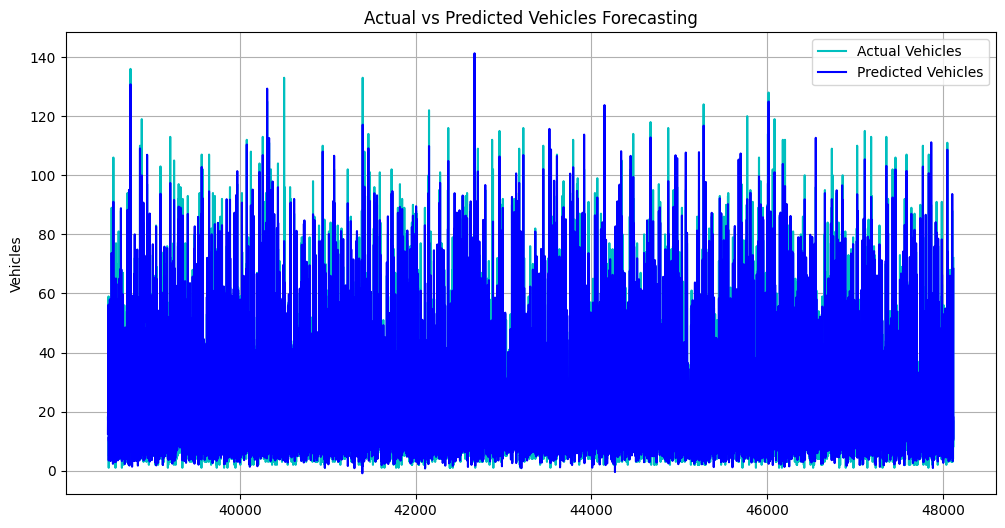

In [40]:
plt.figure(figsize=(12, 6))

# Denormalize the data
y_test_denormalized = scaler.inverse_transform(y_test.reshape(-1, 1))
predictions_denormalized = scaler.inverse_transform(test_predict)

plt.plot(df.index[-len(y_test_denormalized):], y_test_denormalized, label='Actual Vehicles', color='c')
plt.plot(df.index[-len(predictions_denormalized):], predictions_denormalized, label='Predicted Vehicles', color='b')

plt.xlabel('')
plt.ylabel('Vehicles')
plt.title('Actual vs Predicted Vehicles Forecasting')
plt.legend()
plt.grid(True)
plt.show()
